In [22]:
!pip install Pillow matplotlib

In [23]:
import numpy as np

In [24]:
def display_image(img_obj, title = "Reconstructed Image from Text File", cmap = "gray"):
    plt.imshow(img_obj, cmap=cmap)
    plt.title(title)
    plt.axis('off')
    plt.show()

def display_images(images, titles=None):
    num_images = len(images)
    
    # Create a figure with subplots
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    
    for ax, img, title in zip(axes, images, titles or [''] * num_images):
        ax.imshow(img, cmap='gray')
        ax.set_title(title)
        ax.axis('off')  # Hide axes
    
    plt.tight_layout()
    plt.show()

## 1. Load and Display RGB Image

Original Image Dimensions: 640x430


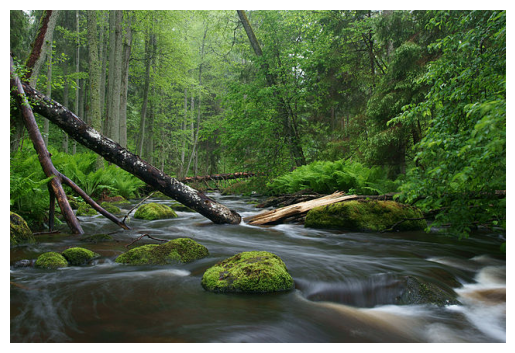

In [25]:
from PIL import Image
import matplotlib.pyplot as plt

file_name = 'nature.jpg'
img = Image.open(file_name)

width, height = img.size
print(f"Original Image Dimensions: {width}x{height}")

# Display the RGB image
plt.imshow(img)
plt.axis('off')  # Hide the axis
plt.show()

## 2. Convert RGB into Grayscale

Grayscale Image Dimensions: 640x430


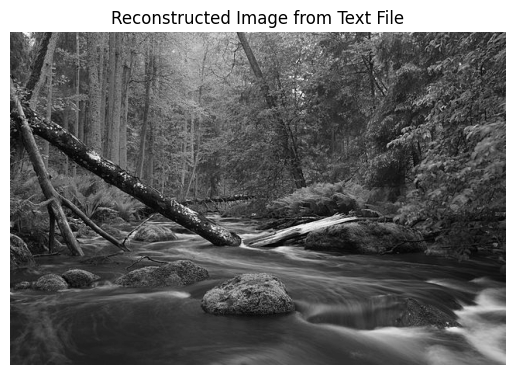

In [26]:
# Convert to grayscale
grayscale_img = img.convert('L')

width, height = img.size
print(f"Grayscale Image Dimensions: {width}x{height}")

# Display the grayscale image
display_image(grayscale_img)

## 3. Read the image and write the intensity values in a separate file

**Image intensity** refers to the *brightness* or *darkness* of a pixel in an image. In grayscale images, each pixel's intensity value ranges from 0 to 255, where:

- 0 represents black (no light).
- 255 represents white (maximum light).
- Values in between represent varying shades of gray.

In [27]:
# Convert the grayscale image to a NumPy array
intensity_array = np.array(grayscale_img)
print("FILE NAME: ", file_name)

print("Image array size (height, width): ", intensity_array.shape)

# Write the intensity values to a text file
with open(f'intensity_values.txt', 'w') as f:
    for row in intensity_array:
        f.write(' '.join(map(str, row)) + '\n')

print(f"Intensity values have been written to 'intensity_values_{file_name.split('.')[0]}.txt'.")

FILE NAME:  nature.jpg
Image array size (height, width):  (430, 640)
Intensity values have been written to 'intensity_values_nature.txt'.


## 4. Multiply/add/substract each intensity value by a constant and display the modified image

In [28]:
def convert_img_pixel(img_array, value: int, operation: str):
    img_copy = img_array.copy()

    for i in range(len(img_copy)):    
        for j in range(len(img_copy[0])):
            if operation == 'multiply':
                img_copy[i, j] = np.clip(img_copy[i, j] * value, 0, 255)  # Clipping to avoid overflow
            elif operation == 'add':
                img_copy[i, j] = np.clip(img_copy[i, j] + value, 0, 255)  # Clipping to avoid overflow
            elif operation == 'subtract':
                img_copy[i, j] = np.clip(img_copy[i, j] - value, 0, 255)  # Clipping to avoid overflow

    return img_copy

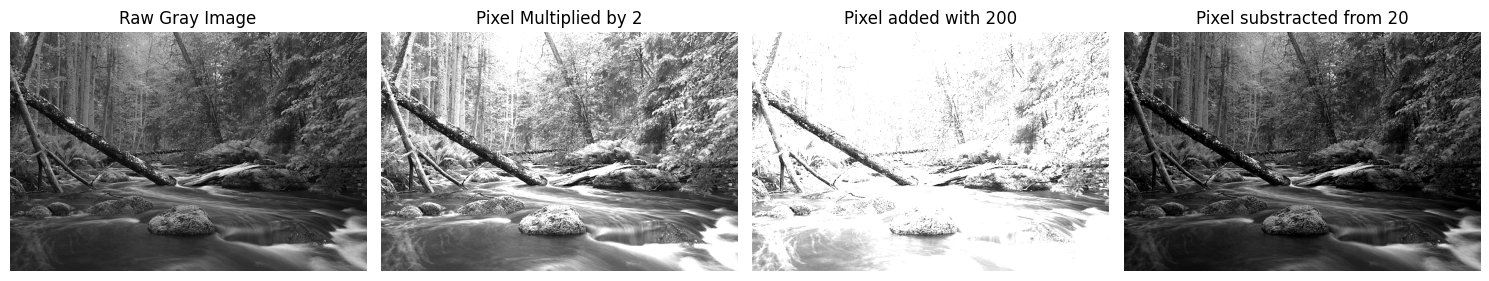

In [29]:
# Read the pixel values from the text file
file_path = f'intensity_values.txt'
img_array = np.loadtxt(file_path, dtype=np.uint8)

# multiply pixel values (making the image noisy)
modified_image_1 = convert_img_pixel(img_array, 2, 'multiply')

# adding pixel values
modified_image_2 = convert_img_pixel(img_array, 200, 'add')

# substracting pixel values
modified_image_3 = convert_img_pixel(img_array, 20, 'subtract')

modified_images = [img_array, modified_image_1, modified_image_2, modified_image_3]
titles = ['Raw Gray Image', "Pixel Multiplied by 2", "Pixel added with 200", "Pixel substracted from 20"]
display_images(modified_images, titles)

## 5. Substract each intensity value from 255 and display the image

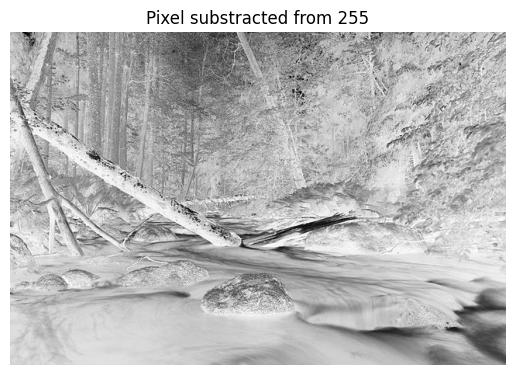

In [30]:
img_obj = img_array

for i in range(len(img_obj)):    
    for j in range(len(img_obj[0])):
        img_obj[i, j] = 255 - img_obj[i, j]

display_image(img_obj, 'Pixel substracted from 255')

## 6. Try to separate each channel of the initial RGB image and display R, G, B channel separately

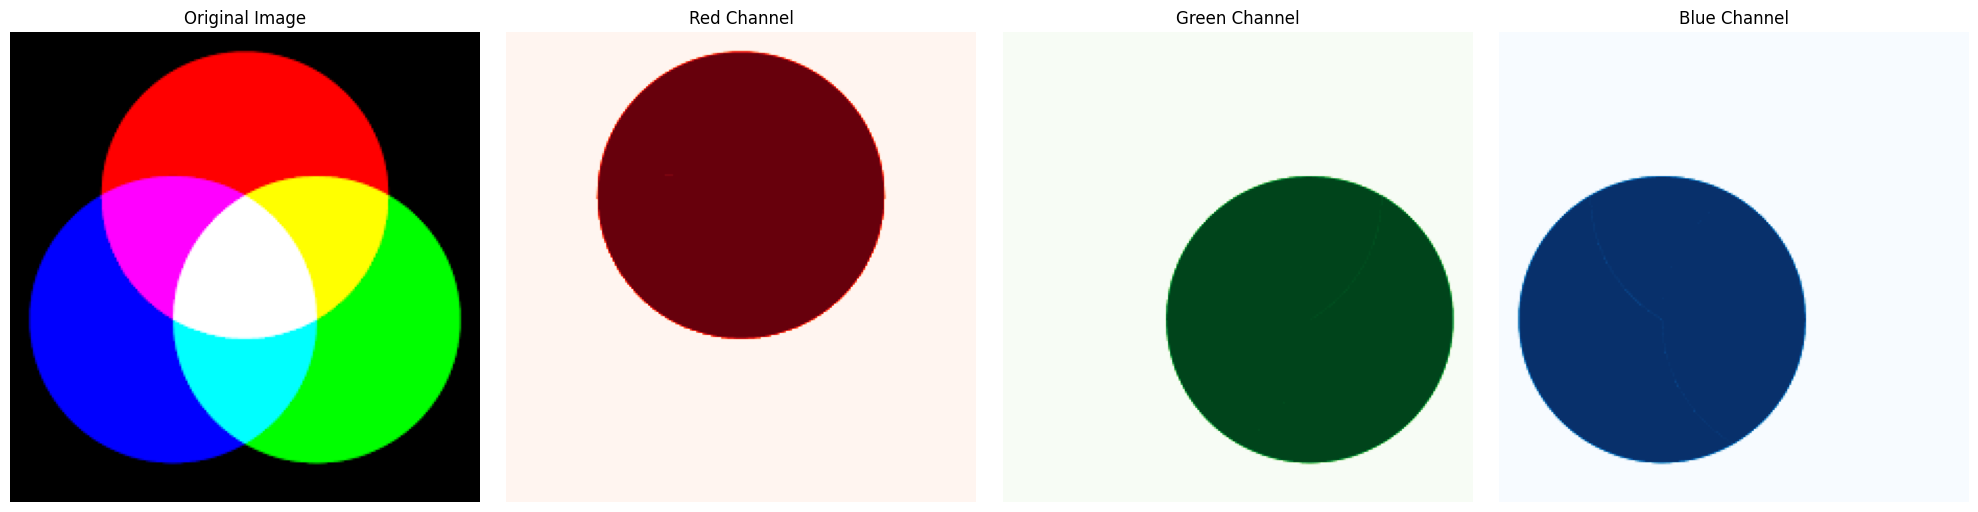

In [31]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Function to separate and display RGB channels
def display_rgb_channels(image_path):
    # Open the RGB image
    img = Image.open(image_path).convert('RGB')
    
    # Convert the image to a NumPy array
    img_array = np.array(img)

    # Separate the channels
    red_channel = img_array[:, :, 0]   # Red channel
    green_channel = img_array[:, :, 1] # Green channel
    blue_channel = img_array[:, :, 2]  # Blue channel

    # Create a figure to display the channels
    fig, axes = plt.subplots(1, 4, figsize=(20, 5))

    # Display original image
    axes[0].imshow(img)
    axes[0].set_title('Original Image')
    axes[0].axis('off')  # Hide axes

    # Display red channel
    axes[1].imshow(red_channel, cmap='Reds')
    axes[1].set_title('Red Channel')
    axes[1].axis('off')  # Hide axes

    # Display green channel
    axes[2].imshow(green_channel, cmap='Greens')
    axes[2].set_title('Green Channel')
    axes[2].axis('off')  # Hide axes

    # Display blue channel
    axes[3].imshow(blue_channel, cmap='Blues')
    axes[3].set_title('Blue Channel')
    axes[3].axis('off')  # Hide axes

    plt.tight_layout()
    plt.show()

# Example usage
display_rgb_channels('rgb.png')


## CNN basic

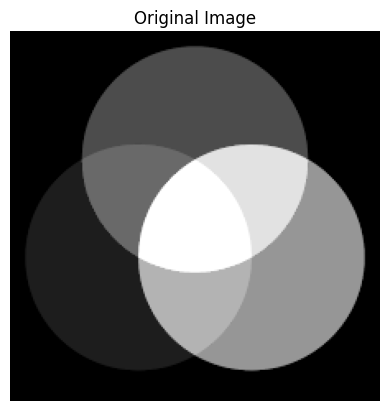

Dimension:  (225, 225)


In [32]:
img = Image.open('rgb.png').convert('L')
display_image(img, "Original Image")
print('Dimension: ', img.size)

In [33]:
image_arr = np.array(img)
image_arr.shape[0]-1

224

Original Image:


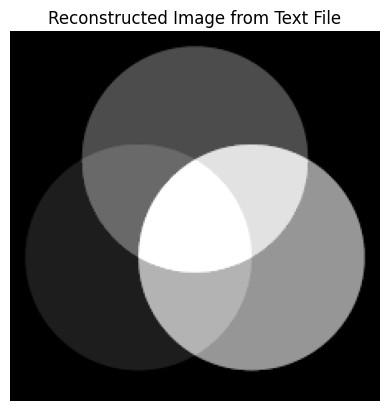

None

Convolved Image:


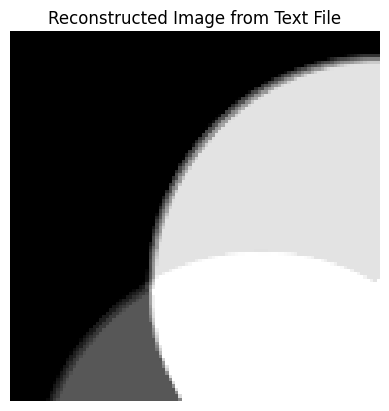

None


(112, 112)

In [35]:
import numpy as np

image_arr = np.array(img)

# Create the original 4x4 grayscale image
dummy_img = np.array([
    [0,   50,  100, 150],
    [200, 255,  200, 100],
    [50,  25,   0,   75],
    [100, 150,  200, 255]
], dtype=np.uint8)

# Define the search element (kernel)
search_element = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])

# Prepare a new image array for the output
stride = 2
new_width = int((image_arr.shape[0] - search_element.shape[0])  / stride) + 1
new_height = int((image_arr.shape[1] - search_element.shape[1])  / stride) + 1

new_image = np.zeros((new_width, new_height), dtype=np.uint8)  

# Perform convolution
for row in range(new_width):  
    for col in range(new_height):  
        
        summation = 0
        # Iterate over the kernel
        for i in range(search_element.shape[0]):  
            for j in range(search_element.shape[1]):  
                # Get the corresponding pixel in the original image
                a = row + i
                b = col + j
                #! Accumulate the convolution
                summation += image_arr[a, b] * search_element[i, j]
        
        # Store the computed value in the new image
        new_image[row, col] = np.clip(summation, 0, 255)  # Ensure the value is in the valid range

print("Original Image:")
print(display_image(image_arr))

print("\nConvolved Image:")
print(display_image(new_image))
new_image.shape